Math 5750/6880: Mathematics of Data Science \\
Project 1

# 3. Python and Google Colab
Project Euler Problem  
https://projecteuler.net/

In [ ]:
# Problem 48, Self Powers
k = 0
series = []

for i in range(1,1001):
  i = i**i
  k += i
  series.append(k)

print(f"The last element of the series (list): {series[-1]}")
print(f"The last 10 digits of the last element in the series: {str(series[-1])[-10:]}")

The last element of the series (list): 1000368199144695177095375011227646795567793680622934654583760988100234910747716194381428659099527845945869942643191290894720342979906407679647259860434238468038326040809691037615370376237713648510063115732951461774246705584266865759601815843666442832284556880313114548151539190975398485496645576513465858582712336401166221956188173449531674102688908321764663020306699770408625340766091595022791379368098369306375602813856646358773751558775213460225796579846583334007349358624342339332981334571237888809283103348760261360175950815609179464026871005243652109980863552142014242903434068560936573231079342194031864413918101238151056509267393515760392842472501391594073463001521843811073767021711026307504695733467897821866906648469828346607412967395801797791683609834722432241952845352564681868240369569566192825555323558078061997527689983848863374786789331581565252059172614339424600986143259233167583371070362625554531852054166117148858229508581589614337594463277

# 4. Regression Analysis
California housing data  
https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

In [6]:
# Load the California housing data
cal = fetch_california_housing(as_frame=True)
X, y = cal.data, cal.target
feature_names = X.columns
print(feature_names)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')


In [7]:
print(X.shape)
print(y.shape)
print()
print(X.info())
print(X.describe())
print(X.head())
print()
print(y.describe())
print(y.head)
print()

(20640, 8)
(20640,)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400  

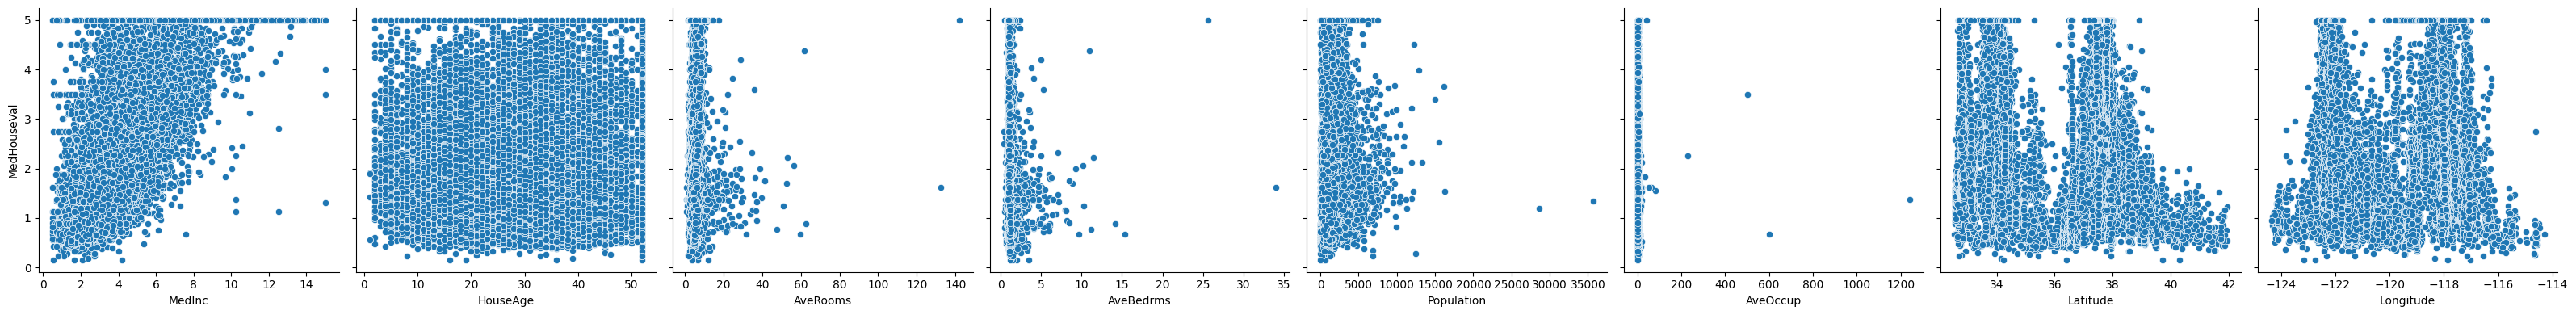

In [8]:
my_df = cal.frame
my_features = my_df.columns.drop('MedHouseVal').tolist()

sns.pairplot(my_df, x_vars=my_features, y_vars=['MedHouseVal'], height=4, aspect=1, kind='scatter')
plt.tight_layout()
plt.show()

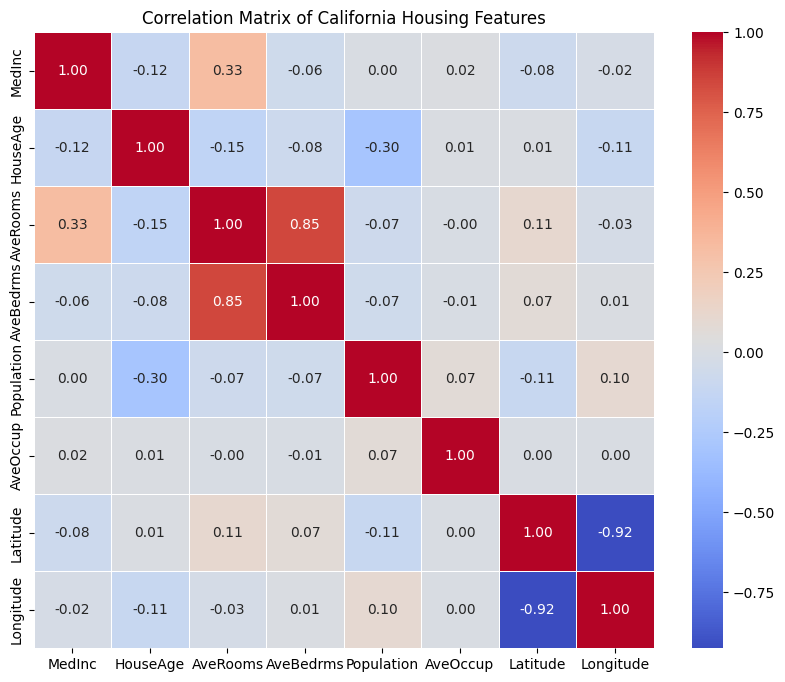

In [9]:
corr = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of California Housing Features')
plt.show()

Linear Regression R-Squared 0.5943232652466202
Linear Regression MAE 0.535126133655451
Linear Regression RMSE 0.7273129773603114




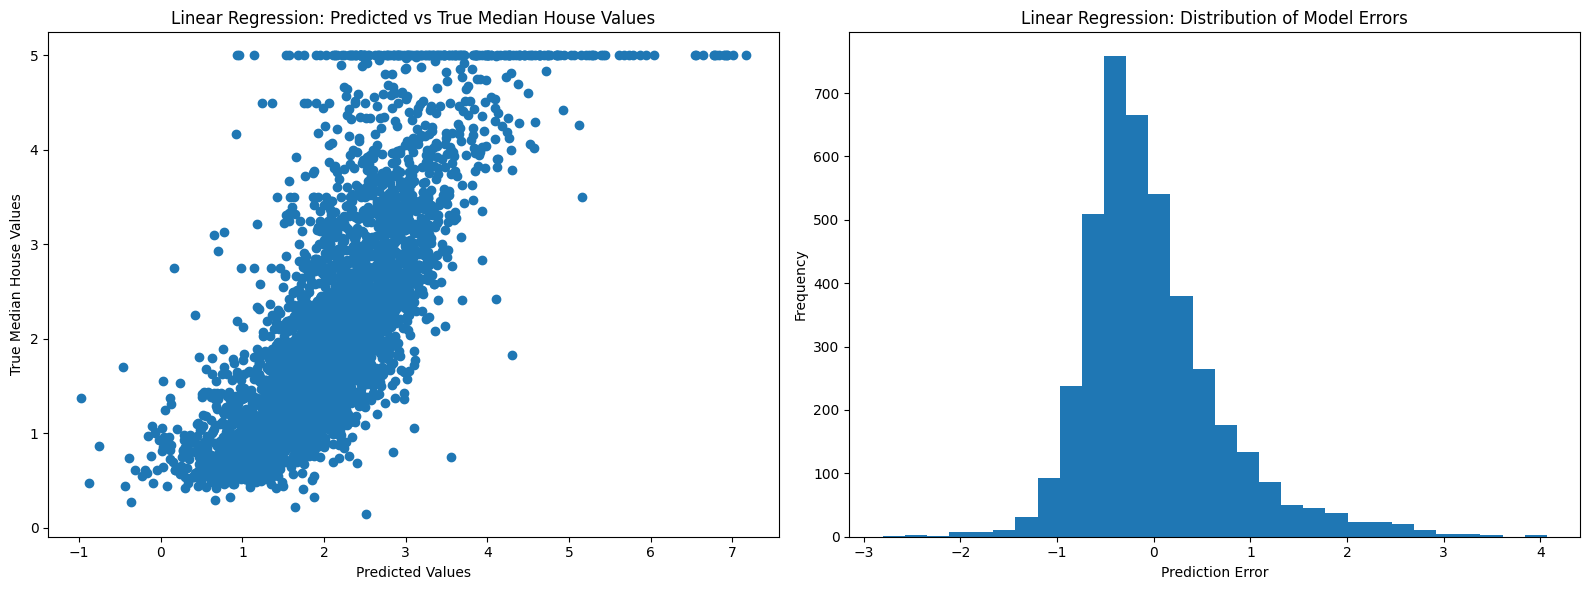

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print("Linear Regression R-Squared", r2_score(y_test, y_pred))
print("Linear Regression MAE", mean_absolute_error(y_test, y_pred))
print("Linear Regression RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

print()
print()

errors = y_test - y_pred

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# First plot: Predicted vs True Values
ax1.scatter(y_pred, y_test)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('True Median House Values')
ax1.set_title('Linear Regression: Predicted vs True Median House Values')

# Second plot: Distribution of Model Errors
ax2.hist(errors, bins=30)
ax2.set_xlabel('Prediction Error')
ax2.set_ylabel('Frequency')
ax2.set_title('Linear Regression: Distribution of Model Errors')

plt.tight_layout()
plt.show()

Unreduced Model:
                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     3212.
Date:                Thu, 04 Sep 2025   Prob (F-statistic):               0.00
Time:                        04:57:24   Log-Likelihood:                -18085.
No. Observations:               16512   AIC:                         3.619e+04
Df Residuals:                   16503   BIC:                         3.626e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.8586      0.737   

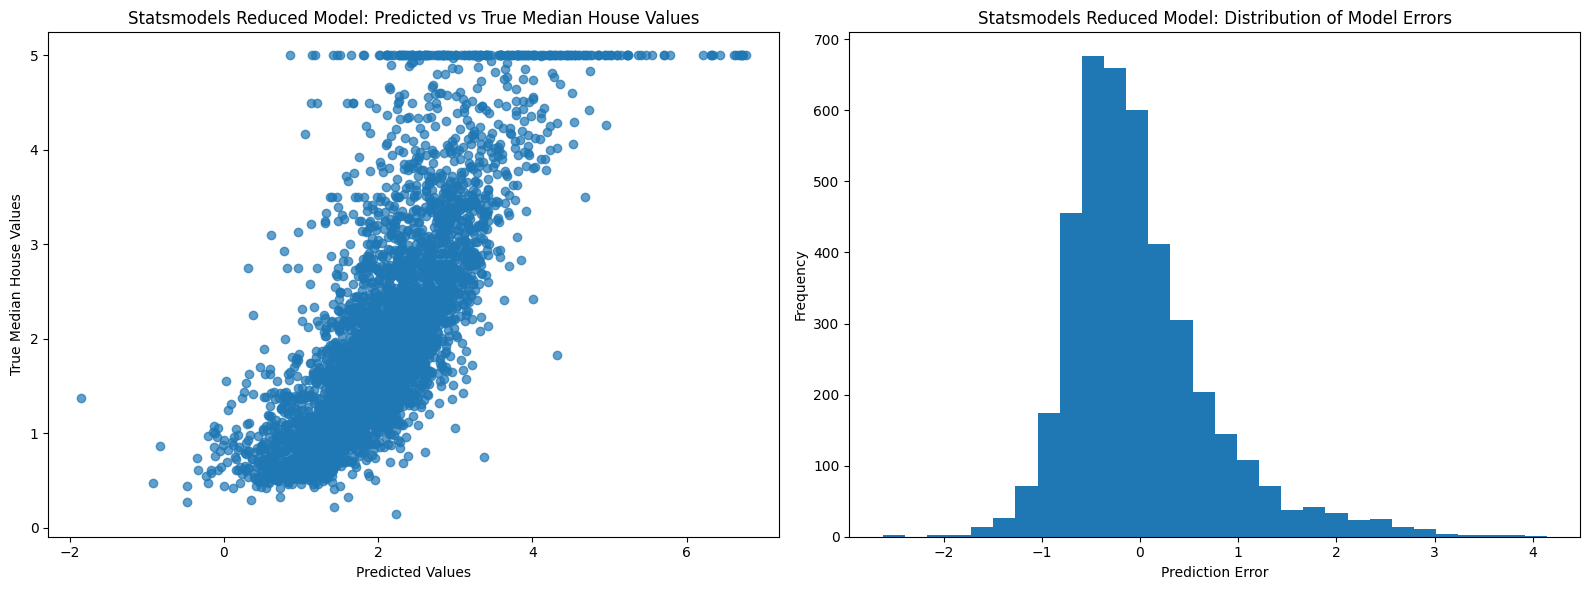

In [29]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()

print("Unreduced Model:")
print(model_sm.summary())

X_train_reduced = X_train.drop(['AveBedrms', 'Population'], axis=1)
X_test_reduced = X_test.drop(['AveBedrms', 'Population'], axis=1)

X_train_sm_reduced = sm.add_constant(X_train_reduced)
model_sm_reduced = sm.OLS(y_train, X_train_sm_reduced).fit()

print()
print("Reduced Model:")
print(model_sm_reduced.summary())

X_test_sm_reduced = sm.add_constant(X_test_reduced)
y_pred_sm = model_sm_reduced.predict(X_test_sm_reduced)

print()
print("Statsmodels Reduced Model Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_sm))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_sm)))

print()
print()

errors_sm = y_test - y_pred_sm

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.scatter(y_pred_sm, y_test, alpha=0.7)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('True Median House Values')
ax1.set_title('Statsmodels Reduced Model: Predicted vs True Median House Values')

ax2.hist(errors_sm, bins=30)
ax2.set_xlabel('Prediction Error')
ax2.set_ylabel('Frequency')
ax2.set_title('Statsmodels Reduced Model: Distribution of Model Errors')

plt.tight_layout()
plt.show()

In [23]:
# Using LASSO for variable selection
scaler = StandardScaler()
scaler.fit(X_train)

sel_ = SelectFromModel(Lasso(alpha=0.01, random_state=10))
sel_.fit(scaler.transform(X_train), y_train)

X_train_selected = sel_.transform(scaler.transform(X_train))
X_test_selected = sel_.transform(scaler.transform(X_test))

# Check which features were selected/removed
selected_features = sel_.get_support()
feature_names = X_train.columns

print("REMOVED FEATURES:")
removed_features = []
for i, feature in enumerate(feature_names):
    if not selected_features[i]:
        print(f"{feature}")
        removed_features.append(feature)

print()
print(f"Total original features: {len(feature_names)}")
print(f"Features selected: {sum(selected_features)}")

X_train_sm = sm.add_constant(X_train_selected)
model_sm = sm.OLS(y_train, X_train_sm).fit()

print(model_sm.summary())

REMOVED FEATURES:
Population

Total original features: 8
Features selected: 7
                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     3670.
Date:                Thu, 04 Sep 2025   Prob (F-statistic):               0.00
Time:                        04:46:23   Log-Likelihood:                -18086.
No. Observations:               16512   AIC:                         3.619e+04
Df Residuals:                   16504   BIC:                         3.625e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

Decision Tree R-Squared 0.5876040026078756
Decision Tree MAE 0.4699059375
Decision Tree RMSE 0.7333115180429477




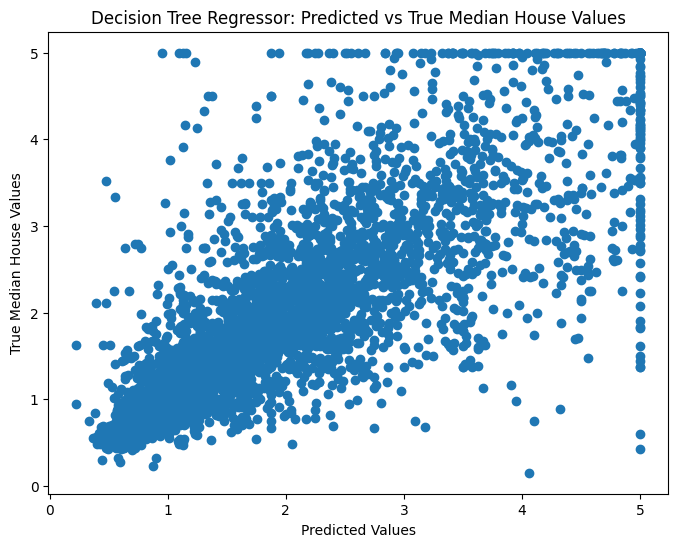

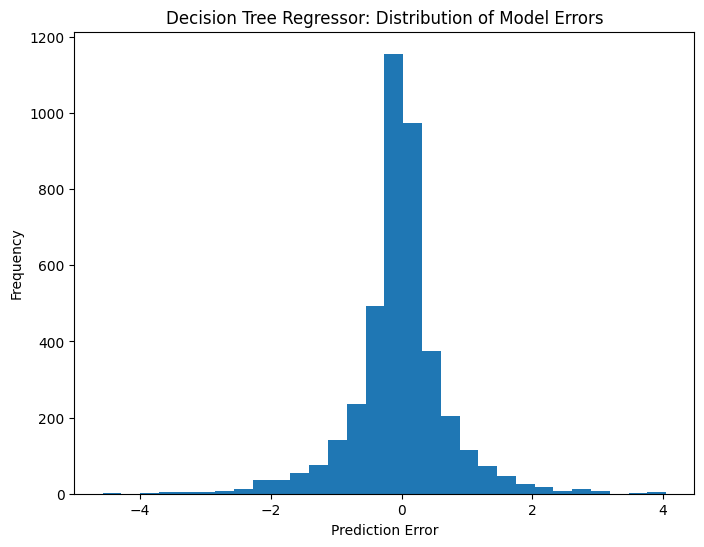

In [24]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Decision Tree R-Squared", r2_score(y_test, y_pred))
print("Decision Tree MAE", mean_absolute_error(y_test, y_pred))
print("Decision Tree RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

print()
print()

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_test)
plt.xlabel('Predicted Values')
plt.ylabel('True Median House Values')
plt.title('Decision Tree Regressor: Predicted vs True Median House Values')
plt.show()

print()
print()

errors = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.hist(errors, bins=30)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Decision Tree Regressor: Distribution of Model Errors')
plt.show()

Random Forest R-Squared 0.7996237440215721
Random Forest MAE 0.3339784755329459
Random Forest RMSE 0.5111571199646462




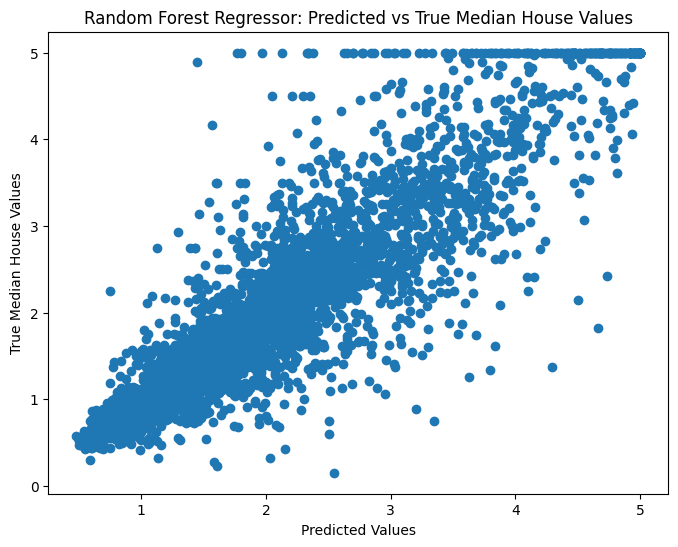

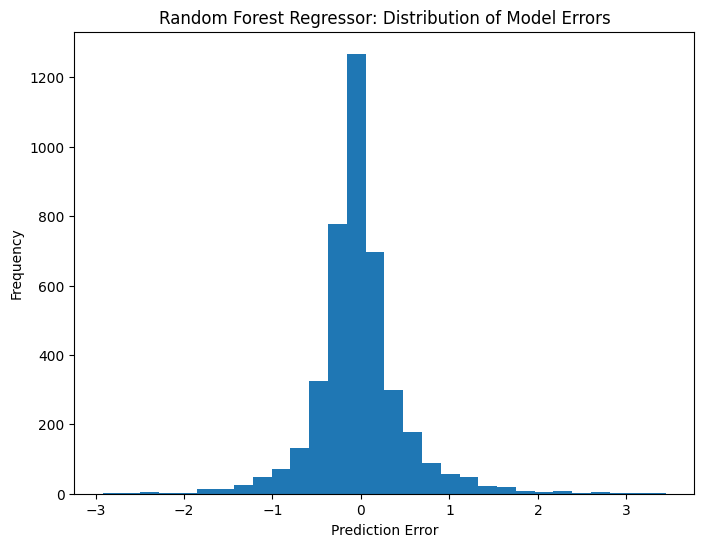

In [25]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Random Forest R-Squared", r2_score(y_test, y_pred))
print("Random Forest MAE", mean_absolute_error(y_test, y_pred))
print("Random Forest RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

print()
print()

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_test)
plt.xlabel('Predicted Values')
plt.ylabel('True Median House Values')
plt.title('Random Forest Regressor: Predicted vs True Median House Values')
plt.show()

print()
print()

errors = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.hist(errors, bins=30)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Random Forest Regressor: Distribution of Model Errors')
plt.show()

Gradient Boosting R-Squared 0.7773221139127737
Gradient Boosting MAE 0.3741187411218649
Gradient Boosting RMSE 0.5388524113340591




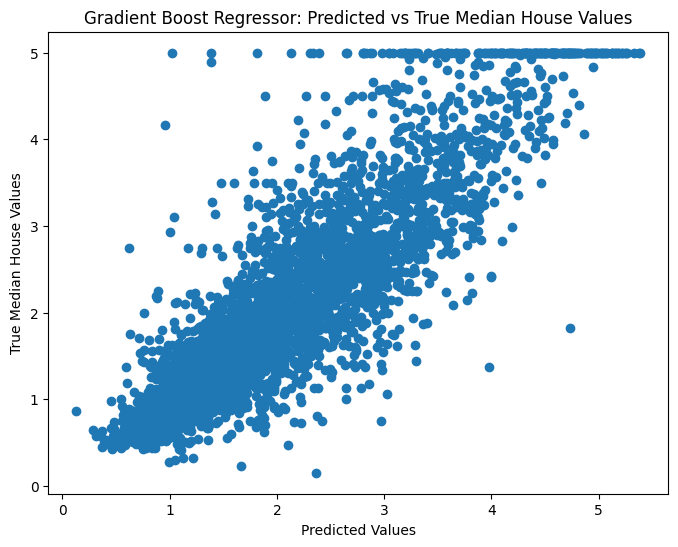

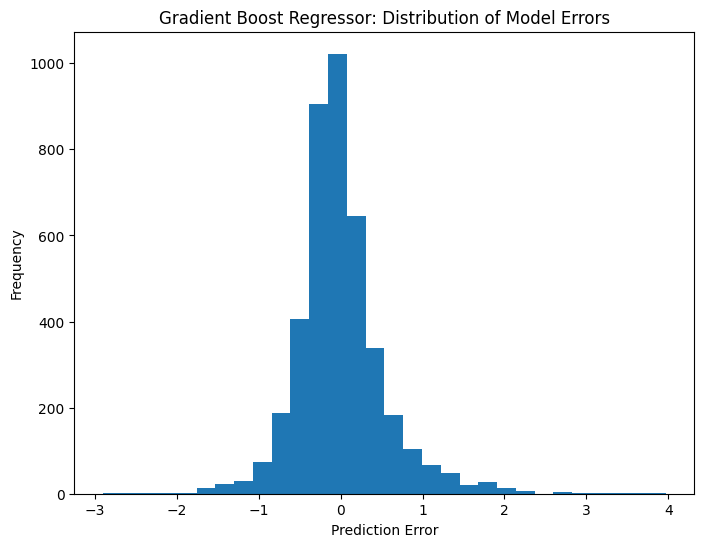

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Gradient Boosting R-Squared", r2_score(y_test, y_pred))
print("Gradient Boosting MAE", mean_absolute_error(y_test, y_pred))
print("Gradient Boosting RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

print()
print()

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_test)
plt.xlabel('Predicted Values')
plt.ylabel('True Median House Values')
plt.title('Gradient Boost Regressor: Predicted vs True Median House Values')
plt.show()

print()
print()

errors = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.hist(errors, bins=30)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Gradient Boost Regressor: Distribution of Model Errors')
plt.show()

Bayesian Ridge R-Squared 0.5942506084924775
Bayesian Ridge MAE 0.5351853504668542
Bayesian Ridge RMSE 0.7273781053671272




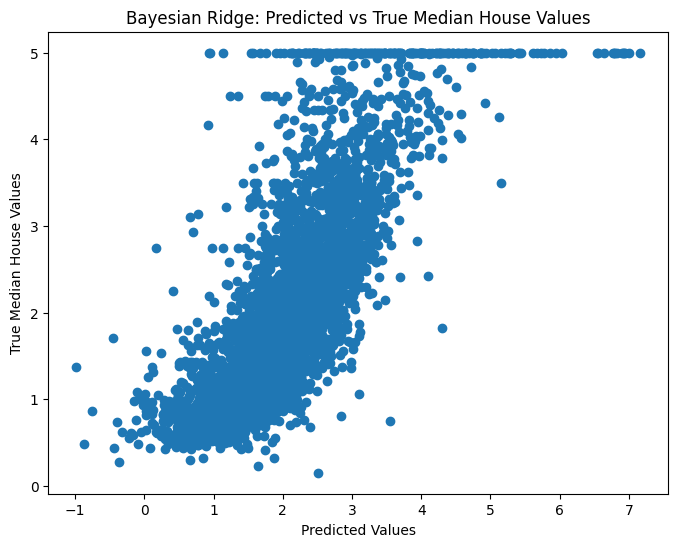

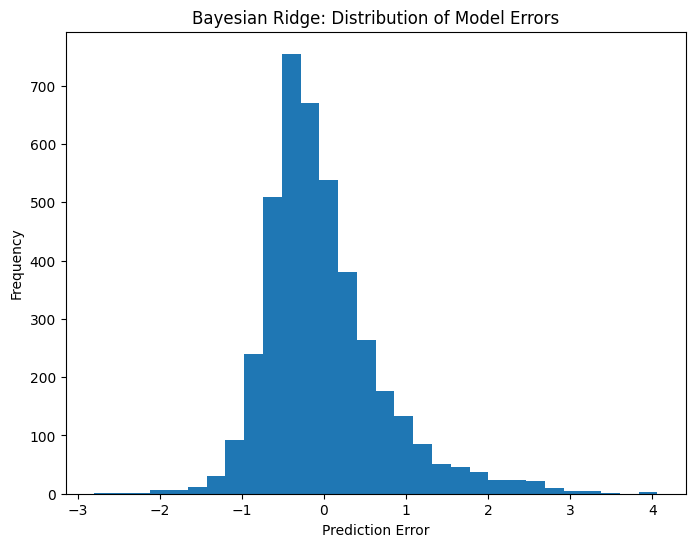

In [ ]:
from sklearn.linear_model import BayesianRidge

model = BayesianRidge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Bayesian Ridge R-Squared", r2_score(y_test, y_pred))
print("Bayesian Ridge MAE", mean_absolute_error(y_test, y_pred))
print("Bayesian Ridge RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

print()
print()

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_test)
plt.xlabel('Predicted Values')
plt.ylabel('True Median House Values')
plt.title('Bayesian Ridge: Predicted vs True Median House Values')
plt.show()

print()
print()

errors = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.hist(errors, bins=30)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Bayesian Ridge: Distribution of Model Errors')
plt.show()

# 5. Classification Analysis
Diagnostic Wisconsin Breast Cancer Database  
https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix, accuracy_score, roc_auc_score, average_precision_score, roc_curve, precision_recall_curve, auc)
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load Breast Cancer Wisconsin Dataset
data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target                  # 0 = malignant, 1 = benign
feature_names = X.columns
label_names = {0: "malignant", 1: "benign"}
print(feature_names)

# Train/Test Split (stratified to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

# Preprocess Data (fit on train ONLY; then transform both)
scaler = StandardScaler(with_mean=True, with_std=True)
X_train_std = scaler.fit_transform(X_train)   # fit on train
X_test_std  = scaler.transform(X_test)        # transform test with train stats

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


In [ ]:
print(X.shape)
print(y.shape)
print()
print(X.info())
print(X.describe())
print()
print(y.describe())
print()

(569, 30)
(569,)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothne

In [ ]:
# Support Vector Machine
from sklearn.svm import SVC

svm = SVC(random_state=0)
svm.fit(X_train_std, y_train)
y_pred_svm = svm.predict(X_test_std)

print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print()
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Confusion Matrix:
[[40  2]
 [ 2 70]]

SVM Accuracy: 0.9649122807017544


SVM CLASSIFICATION RESULTS
Confusion Matrix:
[[40  2]
 [ 2 70]]

Accuracy: 0.9649
ROC AUC: 0.9934
Average Precision: 0.9960


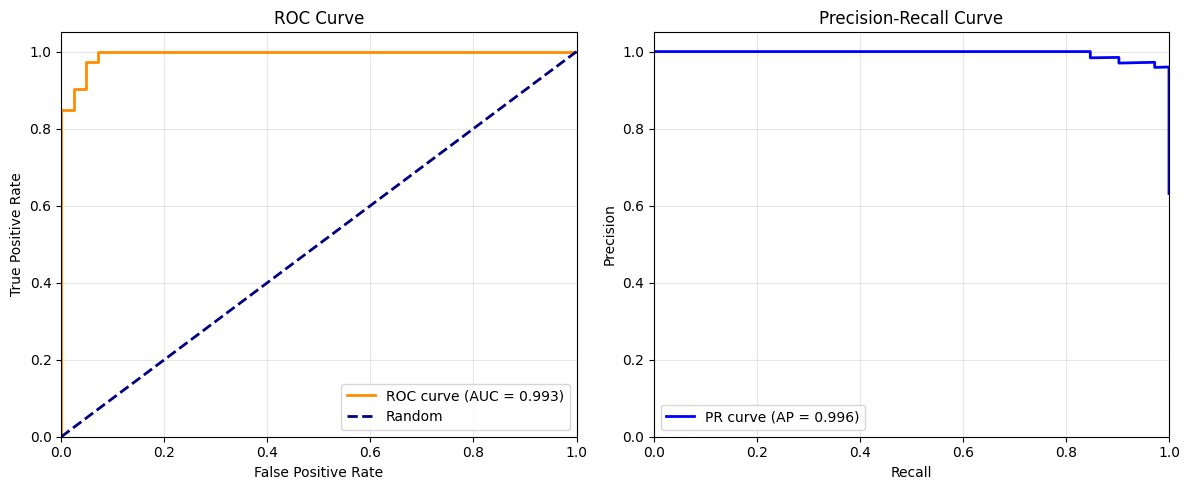

In [ ]:
svm = SVC(random_state=0, probability=True)  # This is the key change!
svm.fit(X_train_std, y_train)
y_pred_svm = svm.predict(X_test_std)
y_pred_proba = svm.predict_proba(X_test_std)[:, 1]  # Get probabilities for positive class

# Print metrics
print("SVM CLASSIFICATION RESULTS")
print("=" * 40)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print()
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print(f"Average Precision: {average_precision_score(y_test, y_pred_proba):.4f}")

# Create plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

ax1.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve')
ax1.legend(loc="lower right")
ax1.grid(True, alpha=0.3)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
avg_precision = average_precision_score(y_test, y_pred_proba)

ax2.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AP = {avg_precision:.3f})')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve')
ax2.legend(loc="lower left")
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

log_reg = LogisticRegression(random_state=0, max_iter=1000)
log_reg.fit(X_train_std, y_train)
y_pred_log = log_reg.predict(X_test_std)

print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))
print()
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))

Logistic Regression Confusion Matrix:
[[40  2]
 [ 0 72]]

Logistic Regression Accuracy: 0.9824561403508771


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0, n_estimators=100)
rf.fit(X_train, y_train)  # Tree models don't need standardization
y_pred_rf = rf.predict(X_test)

print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print()
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Confusion Matrix:
[[40  2]
 [ 4 68]]

Random Forest Accuracy: 0.9473684210526315


In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_std, y_train)
y_pred_nb = nb.predict(X_test_std)

print("Naive Bayes Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))
print()
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

Naive Bayes Confusion Matrix:
[[38  4]
 [ 7 65]]

Naive Bayes Accuracy: 0.9035087719298246


In [ ]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_std, y_train)
y_pred_knn = knn.predict(X_test_std)

print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print()
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

KNN Confusion Matrix:
[[38  4]
 [ 1 71]]

KNN Accuracy: 0.956140350877193


In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)  # Tree models don't need standardization
y_pred_dt = dt.predict(X_test)

print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print()
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Confusion Matrix:
[[40  2]
 [ 5 67]]

Decision Tree Accuracy: 0.9385964912280702
